## Using SVR, elastic net, Xgboost regressor to show predictions of Asthma and Low birth weight

#### Marshall Cyrus

##### Imports

In [329]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from pprint import pprint
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR



import matplotlib.pyplot as plt
import seaborn as sns

#### Read in all merged data

In [330]:
filepath = '../../processed_data/all_merged.csv'
all_enviro = pd.read_csv(filepath)

In [331]:
all_enviro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25444 entries, 0 to 25443
Data columns (total 63 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   zip                          25444 non-null  int64  
 1   total population             25444 non-null  int64  
 2   ozone                        25333 non-null  float64
 3   ozone pctl                   25333 non-null  float64
 4   pm2.5                        25286 non-null  float64
 5   pm2.5 pctl                   25286 non-null  float64
 6   diesel pm                    25444 non-null  float64
 7   diesel pm pctl               25444 non-null  float64
 8   pesticides                   25444 non-null  float64
 9   pesticides pctl              25444 non-null  float64
 10  traffic                      25353 non-null  float64
 11  traffic pctl                 25353 non-null  float64
 12  cleanup sites                25444 non-null  float64
 13  cleanup sites pc

### Cursory look at Correlations between all features in the data.

In [310]:
columns_focus =[
 'total population',
 'ozone',
 'pm2.5',
 'diesel pm',
 'pesticides',
 'traffic',
 'cleanup sites',
 'groundwater threats',
 'haz. waste',
 'imp. water bodies',
 'solid waste',
 'pollution burden',
 'asthma',
 'low birth weight',
 'education',
 'linguistic isolation',
 'poverty',
 'pop. char. ',
 'drinking water',
 'tox. release',
 'unemployment',
 'ces_per',
 'cardiovascular disease',
 'housing burden',
 'est total',
 'est gen',
 'est cold',
 'est farm',
 'est other']

In [311]:
all_enviro_fix = all_enviro[columns_focus].fillna(all_enviro[columns_focus].median())

<AxesSubplot:>

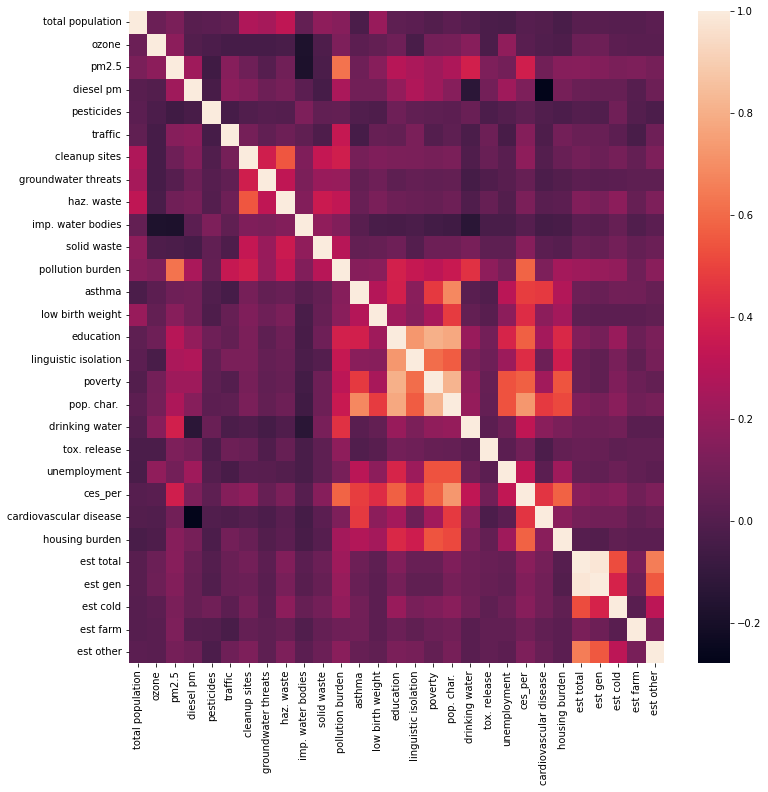

In [312]:
correlations = all_enviro_fix.corr()
plt.figure(figsize = (12,12))
sns.heatmap(correlations)

### Switch to the processed data collection of all merged + processed data from Enviroscreen for comparison & modeling process

In [313]:
filepath = '../../processed_data/all_processed.csv'
enviro = pd.read_csv(filepath)

In [314]:
columns_focus_2 =[
 'total population',
 'ozone',
 'pm2.5',
 'diesel pm',
 'pesticides',
 'traffic',
 'cleanup sites',
 'groundwater threats',
 'haz. waste',
 'imp. water bodies',
 'solid waste',
 'pollution burden',
 'asthma',
 'low birth weight',
 'education',
 'linguistic isolation',
 'poverty',
 'pop. char. ',
 'drinking water',
 'tox. release',
 'unemployment',
 'ces_per',
 'cardiovascular disease',
 'housing burden']

In [315]:
enviro_fix = enviro[columns_focus_2].fillna(enviro[columns_focus_2].median())

<AxesSubplot:>

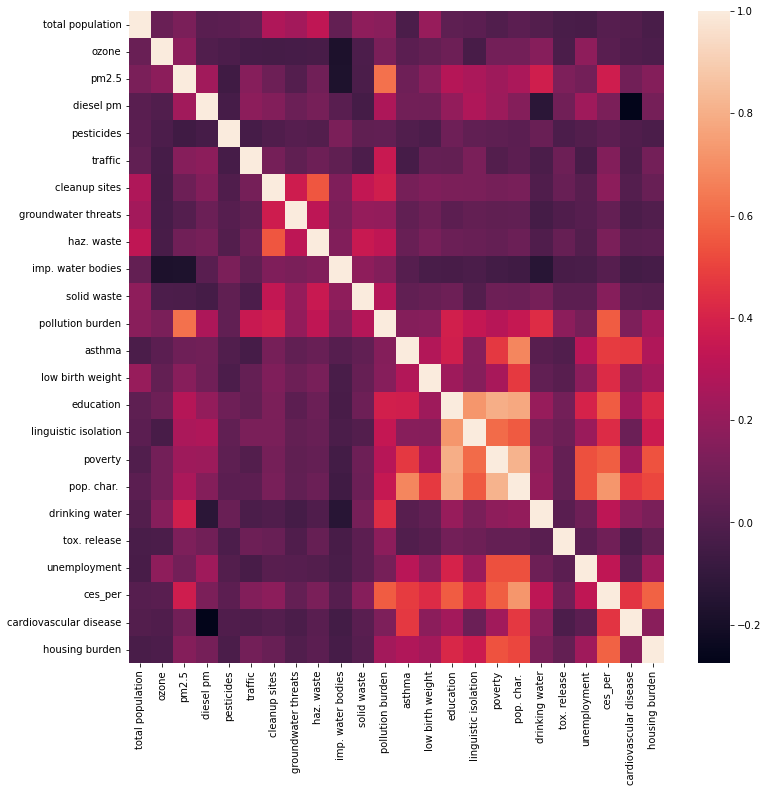

In [316]:
correlations = enviro_fix.corr()
plt.figure(figsize = (12,12))
sns.heatmap(correlations)

## SVR model with scaling (using merged but just to compare to processed)

#### All features included for target asthma

In [323]:
X = all_enviro[['total population',
 'ozone',
 'pm2.5',
 'diesel pm',
 'pesticides',
 'traffic',
 'cleanup sites',
 'groundwater threats',
 'haz. waste',
 'imp. water bodies',
 'solid waste',
 'pollution burden',
 'low birth weight',
 'education',
 'linguistic isolation',
 'poverty',
 'pop. char. ',
 'drinking water',
 'tox. release',
 'unemployment',
 'ces_per',
 'cardiovascular disease',
 'housing burden',
 'est total',
 'est gen',
 'est cold',
 'est farm',
 'est other']]
y = all_enviro['asthma']

#### Take care of nulls

In [325]:

X=pd.get_dummies(X)

#X=X.fillna(X.median())
#y=pd.get_dummies(y)

#get rid of missing target columns
X = X[~y.isna()]
y = y[~y.isna()]

#### Splitting data into train and test sets

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

#### Scaling X values while filling with median values. 

In [293]:

X_train=X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#### setting kernal = rbf and C=1.5

In [294]:
svr = SVR(kernel='rbf', C=1.5)
svr.fit(X_train,y_train)

SVR(C=1.5)

In [295]:
print(f'Train accuracy {svr.score(X_train,y_train)}')
print(f'Test accuracy {svr.score(X_test,y_test)}')

Train accuracy 0.6417075076323279
Test accuracy 0.6215168369963463


### Using default SVR model

In [296]:
svrdefault = SVR()
svrdefault.fit(X_train,y_train)

SVR()

In [297]:
print(f'Train accuracy {svrdefault.score(X_train,y_train)}')
print(f'Test accuracy {svrdefault.score(X_test,y_test)}')

Train accuracy 0.6145317829254042
Test accuracy 0.5964959064045323


### Repeat process with SVR but remove est columns(Need to revise)

In [ ]:
X = enviro[['total population',
 'ozone',
 'pm2.5',
 'diesel pm',
 'pesticides',
 'traffic',
 'cleanup sites',
 'groundwater threats',
 'haz. waste',
 'imp. water bodies',
 'solid waste',
 'pollution burden',
 'low birth weight',
 'education',
 'linguistic isolation',
 'Asthma',
 'poverty',
 'pop. char. ',
 'drinking water',
 'tox. release',
 'unemployment',
 'ces_per',
 'housing burden',]]
y = enviro['cardiovascular disease']

In [ ]:
X=pd.get_dummies(X)

#get rid of missing target columns
X = X[~y.isna()]
y = y[~y.isna()]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
X_train=X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
svr = SVR(kernel='rbf', C=1.5)
svr.fit(X_train,y_train)

In [ ]:
print(f'Train accuracy {svr.score(X_train,y_train)}')
print(f'Test accuracy {svr.score(X_test,y_test)}')

### Switching to low birth weight target varible

In [ ]:
X = all_enviro[['total population',
 'ozone',
 'pm2.5',
 'diesel pm',
 'pesticides',
 'traffic',
 'cleanup sites',
 'groundwater threats',
 'haz. waste',
 'imp. water bodies',
 'solid waste',
 'pollution burden',
 'education',
 'linguistic isolation',
 'Asthma',
 'poverty',
 'pop. char. ',
 'drinking water',
 'tox. release',
 'unemployment',
 'ces_per',
 'housing burden',
 'est total',
 'est gen',
 'est cold',
 'est farm',
 'est other']]
y = all_enviro['low birth weight']

In [ ]:
X=pd.get_dummies(X)

#get rid of missing target columns
X = X[~y.isna()]
y = y[~y.isna()]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
X_train=X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
svr = SVR(kernel='rbf', C=1.5)
svr.fit(X_train,y_train)

In [ ]:
print(f'Train accuracy {svr.score(X_train,y_train)}')
print(f'Test accuracy {svr.score(X_test,y_test)}')

## ElasticNet Regression targeting asthma

In [143]:
X = all_enviro[['total population',
 'ozone',
 'pm2.5',
 'diesel pm',
 'pesticides',
 'traffic',
 'cleanup sites',
 'groundwater threats',
 'haz. waste',
 'imp. water bodies',
 'solid waste',
 'pollution burden',
 'low birth weight',
 'education',
 'linguistic isolation',
 'poverty',
 'pop. char. ',
 'drinking water',
 'tox. release',
 'unemployment',
 'ces_per',
 'cardiovascular disease',
 'housing burden',
 'est total',
 'est gen',
 'est cold',
 'est farm',
 'est other']]
y = all_enviro['asthma']

In [144]:
X=pd.get_dummies(X)
X=X.fillna(X.median())
#y=pd.get_dummies(y)
#get rid of missing target columns
X = X[~y.isna()]
y = y[~y.isna()]

In [147]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state= 42, test_size=.2)

In [148]:
X_train=X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [165]:
elas = ElasticNet(alpha=.1).fit(X_train, y_train)

In [166]:
print(f'Train accuracy {elas.score(X_train,y_train)}')
print(f'Test accuracy {elas.score(X_test,y_test)}')

Train accuracy 0.6001979437059864
Test accuracy 0.5923986338246703


## Elastic net 2 (removed features including health effects, change test size)

In [168]:
X = all_enviro[['total population',
 'ozone',
 'pm2.5',
 'diesel pm',
 'pesticides',
 'traffic',
 'cleanup sites',
 'groundwater threats',
 'haz. waste',
 'solid waste',
 'pollution burden',
 'education',
 'linguistic isolation',
 'poverty',
 'pop. char. ',
 'drinking water',
 'tox. release',
 'unemployment',
 'ces_per',
 'housing burden',]]
y = all_enviro['asthma']

In [169]:
X=pd.get_dummies(X)
X=X.fillna(X.median())

#get rid of missing target columns
X = X[~y.isna()]
y = y[~y.isna()]

In [170]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state= 42, test_size=.1)

In [171]:
X_train=X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [172]:
elas2 = ElasticNet(alpha=.1).fit(X_train, y_train)

In [173]:
print(f'Train accuracy {elas2.score(X_train,y_train)}')
print(f'Test accuracy {elas2.score(X_test,y_test)}')

Train accuracy 0.5805454526556891
Test accuracy 0.5716584288055843


#### ^Decrease in score. I suspect the reduction in data and possible corralated health effects had this impact.

### Random forest regressor (adding all features back into the model)

In [256]:
X = all_enviro[['total population',
 'ozone',
 'pm2.5',
 'diesel pm',
 'pesticides',
 'traffic',
 'cleanup sites',
 'groundwater threats',
 'haz. waste',
 'imp. water bodies',
 'solid waste',
 'pollution burden',
 'low birth weight',
 'education',
 'linguistic isolation',
 'poverty',
 'pop. char. ',
 'drinking water',
 'tox. release',
 'unemployment',
 'ces_per',
 'cardiovascular disease',
 'housing burden',
 'est total',
 'est gen',
 'est cold',
 'est farm',
 'est other']]
y = all_enviro['asthma']

In [257]:
X=pd.get_dummies(X)
X=X.fillna(X.median())

#get rid of missing target columns
X = X[~y.isna()]
y = y[~y.isna()]

#### Resplit data & instantiate standard scaler

In [258]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state= 42, test_size=.1)

In [259]:
X_train=X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [260]:
rf= RandomForestRegressor().fit(X_train,y_train)

print(f'Train accuracy {rf.score(X_train,y_train)}')
print(f'Test accuracy {rf.score(X_test,y_test)}')

Train accuracy 0.9679942632280808
Test accuracy 0.7771260548259455


#### ^Second highest model score

## Grid search for Random forest regressor

In [270]:
gsc = GridSearchCV(
            estimator=RandomForestRegressor(),
            param_grid={ 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            },
            cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

In [271]:
rf_result = gsc.fit(X_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [272]:
rf_results=pd.DataFrame(gsc.cv_results_)
rf_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.574543,0.034254,0.017838,0.002144,True,auto,2,10,"{'bootstrap': True, 'max_features': 'auto', 'm...",-231.876212,-226.512319,-218.217855,-225.535462,5.618621,24
1,5.184236,0.070472,0.035100,0.002477,True,auto,2,20,"{'bootstrap': True, 'max_features': 'auto', 'm...",-217.647359,-217.805076,-201.048269,-212.166901,7.862324,12
2,7.808550,0.055704,0.061205,0.007615,True,auto,2,30,"{'bootstrap': True, 'max_features': 'auto', 'm...",-212.504169,-208.336091,-199.724760,-206.855007,5.321249,5
3,2.395914,0.029353,0.019543,0.002616,True,auto,4,10,"{'bootstrap': True, 'max_features': 'auto', 'm...",-226.647823,-229.390446,-218.559186,-224.865819,4.597877,23
4,4.859009,0.038531,0.033325,0.001047,True,auto,4,20,"{'bootstrap': True, 'max_features': 'auto', 'm...",-216.620748,-216.823342,-206.123748,-213.189279,4.996769,15
5,7.136932,0.037052,0.044898,0.004100,True,auto,4,30,"{'bootstrap': True, 'max_features': 'auto', 'm...",-205.425918,-208.748548,-198.972775,-204.382414,4.058580,2
6,2.245565,0.017911,0.012362,0.000699,True,auto,8,10,"{'bootstrap': True, 'max_features': 'auto', 'm...",-225.418025,-229.691087,-217.817425,-224.308846,4.910442,22
7,4.416285,0.050946,0.026638,0.004642,True,auto,8,20,"{'bootstrap': True, 'max_features': 'auto', 'm...",-211.699001,-217.116578,-208.180145,-212.331908,3.675630,14
8,6.752115,0.087710,0.043214,0.002067,True,auto,8,30,"{'bootstrap': True, 'max_features': 'auto', 'm...",-212.719970,-212.736691,-201.189458,-208.882040,5.439481,7
9,0.564050,0.015163,0.022908,0.002778,True,sqrt,2,10,"{'bootstrap': True, 'max_features': 'sqrt', 'm...",-245.337756,-245.830635,-243.609194,-244.925862,0.952521,40


In [273]:
rf = RandomForestRegressor(**gsc.best_params_).fit(X_train, y_train)

In [274]:
print(f'Train accuracy {rf.score(X_train,y_train)}')
print(f'Test accuracy {rf.score(X_test,y_test)}')

Train accuracy 0.9977462860392461
Test accuracy 0.7759658304394461


#### ^Minor decrease

### XGboost regressor (Best model)

#### Install homebrew and instantiate XGboost from terminal

In [176]:
X = all_enviro[['total population',
 'ozone',
 'pm2.5',
 'diesel pm',
 'pesticides',
 'traffic',
 'cleanup sites',
 'groundwater threats',
 'haz. waste',
 'imp. water bodies',
 'solid waste',
 'pollution burden',
 'low birth weight',
 'education',
 'linguistic isolation',
 'poverty',
 'pop. char. ',
 'drinking water',
 'tox. release',
 'unemployment',
 'ces_per',
 'cardiovascular disease',
 'housing burden',
 'est total',
 'est gen',
 'est cold',
 'est farm',
 'est other']]
y = all_enviro['asthma']

In [180]:
X=pd.get_dummies(X)
X=X.fillna(X.median())

#get rid of missing target columns
X = X[~y.isna()]
y = y[~y.isna()]

In [181]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state= 42, test_size=.1)

In [182]:
X_train=X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [183]:
xgbr = XGBRegressor().fit(X_train, y_train)

In [184]:
print(f'Train accuracy {xgbr.score(X_train,y_train)}')
print(f'Test accuracy {xgbr.score(X_test,y_test)}')

Train accuracy 0.9477646667937981
Test accuracy 0.8477909703105799


### Grid Search and CrossVal to tune XGBoost regressor (verbose could be 2)

In [232]:
gsc = GridSearchCV(
            estimator=XGBRegressor(nthread=4),
            param_grid={"learning_rate":[0.10,0.15,0.20],
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],
                       'nthread':[4]},
            cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=1)

In [233]:
result = gsc.fit(X_train,y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


### Visual of data frame with best parameters from grid search.

In [235]:
results=pd.DataFrame(gsc.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_min_child_weight,param_nthread,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.437826,0.020561,0.004880,0.001270,0.3,0.0,0.1,3,1,4,"{'colsample_bytree': 0.3, 'gamma': 0.0, 'learn...",-255.355284,-258.879801,-255.692773,-256.642619,1.587915,352
1,0.440830,0.034355,0.003910,0.000325,0.3,0.0,0.1,3,3,4,"{'colsample_bytree': 0.3, 'gamma': 0.0, 'learn...",-257.325303,-259.648792,-255.327261,-257.433785,1.765924,358
2,0.437925,0.007301,0.007704,0.002918,0.3,0.0,0.1,3,5,4,"{'colsample_bytree': 0.3, 'gamma': 0.0, 'learn...",-256.039198,-258.546570,-254.950409,-256.512059,1.505720,349
3,0.439613,0.034451,0.007451,0.003064,0.3,0.0,0.1,3,7,4,"{'colsample_bytree': 0.3, 'gamma': 0.0, 'learn...",-255.865983,-258.122707,-256.082123,-256.690271,1.016721,355
4,0.614281,0.022542,0.004739,0.000648,0.3,0.0,0.1,4,1,4,"{'colsample_bytree': 0.3, 'gamma': 0.0, 'learn...",-232.011628,-232.411207,-227.136319,-230.519718,2.397979,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.794237,0.033471,0.005738,0.000131,0.4,0.2,0.2,6,7,4,"{'colsample_bytree': 0.4, 'gamma': 0.2, 'learn...",-172.724122,-169.858045,-164.326904,-168.969690,3.485226,29
356,1.173167,0.012594,0.007913,0.000252,0.4,0.2,0.2,8,1,4,"{'colsample_bytree': 0.4, 'gamma': 0.2, 'learn...",-168.828850,-169.575909,-163.589863,-167.331540,2.663286,14
357,1.158564,0.032150,0.007093,0.000159,0.4,0.2,0.2,8,3,4,"{'colsample_bytree': 0.4, 'gamma': 0.2, 'learn...",-172.472336,-169.338810,-165.353013,-169.054720,2.913385,32
358,1.147017,0.011838,0.007407,0.000272,0.4,0.2,0.2,8,5,4,"{'colsample_bytree': 0.4, 'gamma': 0.2, 'learn...",-165.698087,-170.863850,-162.325979,-166.295972,3.511117,9


Rerun GS Cv on all models and fit to best params, change target variable for other health conditions, show different R2 score, RMSE score and plot. remove other health conditions in X set. 

### Best parameters fit onto XGBoost Regressor

In [236]:
xgbr = XGBRegressor(**gsc.best_params_).fit(X_train, y_train)

In [237]:
print(f'Train accuracy {xgbr.score(X_train,y_train)}')
print(f'Test accuracy {xgbr.score(X_test,y_test)}')

Train accuracy 0.9711293514324658
Test accuracy 0.8353131846907991


#### ^accuracy does not improve with GS CV

In [ ]:
## 

In [ ]:
# preds = xgbr.predict(X_train)
# train_score= r2_score(y_train,preds)
# test_score= r2_score(y_test,X_test)

## Random forest regressor best params (Ignore for now)

In [49]:
X = all_enviro[['total population',
 'ozone',
 'pm2.5',
 'diesel pm',
 'pesticides',
 'traffic',
 'cleanup sites',
 'groundwater threats',
 'haz. waste',
 'imp. water bodies',
 'solid waste',
 'pollution burden',
 'asthma',
 'low birth weight',
 'education',
 'linguistic isolation',
 'poverty',
 'pop. char. ',
 'drinking water',
 'tox. release',
 'unemployment',
 'ces_per',
 'cardiovascular disease',
 'housing burden',
 'est total',
 'est gen',
 'est cold',
 'est farm',
 'est other']]
y = all_enviro['asthma']

In [51]:
rf = RandomForestRegressor(random_state = 42)

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state= 42, test_size=.2)

In [47]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [48]:
# grid search
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
#rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)